# Linear Models for Regression
Linear models are a class of models that are widely used in practice and have been studied extensively in the last few decades, with roots going back over a hundred years. Let's load the packages and the dataset.

In [24]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                            n_informative=1, bias = 150.0,
                            noise = 30, random_state=0)
def load_crime_dataset():
    # Communities and Crime dataset for regression
    # https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime+Unnormalized

    crime = pd.read_table('CommViolPredUnnormalizedData.txt', sep=',', na_values='?')
    # remove features with poor coverage or lower relevance, and keep ViolentCrimesPerPop target column
    columns_to_keep = [5, 6] + list(range(11,26)) + list(range(32, 103)) + [145]  
    crime = crime.iloc[:,columns_to_keep].dropna()

    X_crime = crime.iloc[:,range(0,88)]
    y_crime = crime['ViolentCrimesPerPop']

    return (X_crime, y_crime)
(X_crime, y_crime) = load_crime_dataset()

C:\Users\rashedi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: read_table is deprecated, use read_csv instead.
  from ipykernel import kernelapp as app


We visualize the regression data that we have generated.

<IPython.core.display.Javascript object>


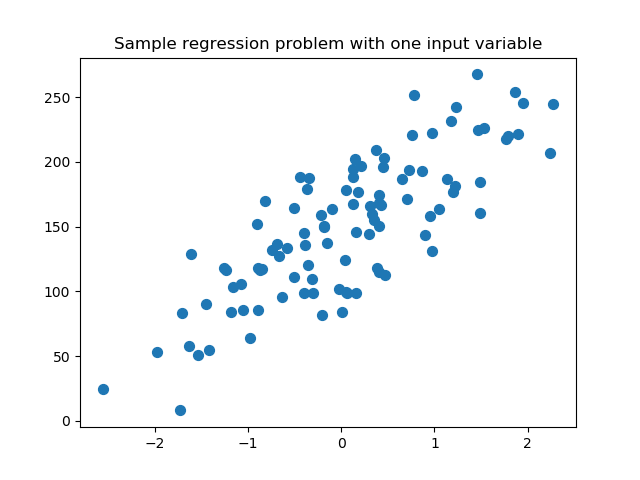

In [25]:
plt.figure()
plt.title('Sample regression problem with one input variable')
plt.scatter(X_R1, y_R1, marker= 'o', s=50)
plt.show()

We can also display the crime data in a table, which seems to be for the US.

In [28]:
crime = pd.read_table('CommViolPredUnnormalizedData.txt', sep=',', na_values='?')
columns_to_keep = [5, 6] + list(range(11,26)) + list(range(32, 103)) + [145]
crime = crime.iloc[:,columns_to_keep].dropna()
crime.head()

C:\Users\rashedi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead.
  """Entry point for launching an IPython kernel.


,population,householdsize,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,...,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,ViolentCrimesPerPop
0,11980,3.10,12.47,21.44,10.93,11.33,11980,100.0,75122,89.24,...,21.1,14.0,11,0,10.66,53.72,65.29,78.09,89.14,41.02
1,23123,2.82,11.01,21.30,10.48,17.18,23123,100.0,47917,78.99,...,20.7,12.5,0,0,8.30,77.17,71.27,90.22,96.12,127.56
2,29344,2.43,11.36,25.88,11.01,10.28,29344,100.0,35669,82.00,...,21.7,11.6,16,0,5.00,44.77,36.60,61.26,82.85,218.59
3,16656,2.40,12.55,25.20,12.19,17.57,0,0.0,20580,68.15,...,20.6,14.5,0,0,2.04,88.71,56.70,90.17,96.24,306.64
5,140494,2.45,18.09,32.89,20.04,13.26,140494,100.0,21577,75.78,...,17.3,11.7,327,4,1.49,64.35,42.29,70.61,85.66,442.95


## Linear Regression
First, we train a linear model for the generated regression data (X_R1 and y_R1). Please note that there is only one column of data for X_R1, i.e. the output is modeled based on one feature only.

In [30]:
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1,random_state=0)
linreg = LinearRegression().fit(X_train, y_train)

print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

linear model coeff (w): [45.70870465]
linear model intercept (b): 148.446
R-squared score (training): 0.679
R-squared score (test): 0.492


Now, we plot the trained model within the actual data.

<IPython.core.display.Javascript object>


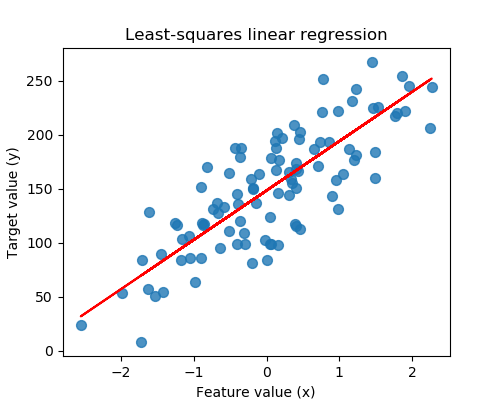

In [31]:
plt.figure(figsize=(5,4))
plt.scatter(X_R1, y_R1, marker= 'o', s=50, alpha=0.8)
plt.plot(X_R1, linreg.coef_ * X_R1 + linreg.intercept_, 'r-')
plt.title('Least-squares linear regression')
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)')
plt.show()

This time, we train the model based on the crime data, which uses 89 features for predicting the output.

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('Crime dataset')
print('linear model intercept: {}'
     .format(linreg.intercept_))
print('linear model coeff:\n{}'
     .format(linreg.coef_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

Crime dataset
linear model intercept: -1728.1306726021885
linear model coeff:
[ 1.61892346e-03 -9.43009110e+01  1.36067510e+01 -3.13380670e+01
 -8.15482721e-02 -1.69455128e+01 -2.42730375e-03  1.53013232e+00
 -1.39193248e-02 -7.72112833e+00  2.28112354e+01 -5.65708295e+00
  9.34751364e+00  2.06969566e-01 -7.43413626e+00  9.65856476e-03
  4.38030290e-03  4.79754625e-03 -4.46469212e+00 -1.60907140e+01
  8.82778012e+00 -5.06734503e-01 -1.42198055e+00  8.17551991e+00
 -3.87048268e+00 -3.54209213e+00  4.48758304e+00  9.30645715e+00
  1.73644996e+02  1.18220766e+01  1.51120836e+02 -3.29613007e+02
 -1.35343395e+02  6.95380108e-01 -2.38369008e+01  2.77038981e+00
  3.82248925e-01  4.38813358e+00 -1.06410851e+01 -4.92294176e-03
  4.14031827e+01 -1.16206866e-03  1.18568968e+00  1.75418465e+00
 -3.68283678e+00  1.59679443e+00 -8.42180230e+00 -3.79703897e+01
  4.74076990e+01 -2.50768374e+01 -2.88246410e-01 -3.65633234e+01
  1.89516080e+01 -4.53336736e+01  6.82698598e+02  1.04478671e+02
 -3.28575414

## Ridge Regression
Since there are 89 features with the crime data, we might get a better result by using regularization. So, first we try Ridge regression.

In [35]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,
                                                   random_state = 0)

linridge = Ridge(alpha=20.0).fit(X_train, y_train)

print('Crime dataset')
print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

Crime dataset
ridge regression linear model intercept: -3352.4230358463437
ridge regression linear model coeff:
[ 1.95091438e-03  2.19322667e+01  9.56286607e+00 -3.59178973e+01
  6.36465325e+00 -1.96885471e+01 -2.80715856e-03  1.66254486e+00
 -6.61426604e-03 -6.95450680e+00  1.71944731e+01 -5.62819154e+00
  8.83525114e+00  6.79085746e-01 -7.33614221e+00  6.70389803e-03
  9.78505502e-04  5.01202169e-03 -4.89870524e+00 -1.79270062e+01
  9.17572382e+00 -1.24454193e+00  1.21845360e+00  1.03233089e+01
 -3.78037278e+00 -3.73428973e+00  4.74595305e+00  8.42696855e+00
  3.09250005e+01  1.18644167e+01 -2.05183675e+00 -3.82210450e+01
  1.85081589e+01  1.52510829e+00 -2.20086608e+01  2.46283912e+00
  3.29328703e-01  4.02228467e+00 -1.12903533e+01 -4.69567413e-03
  4.27046505e+01 -1.22507167e-03  1.40795790e+00  9.35041855e-01
 -3.00464253e+00  1.12390514e+00 -1.82487653e+01 -1.54653407e+01
  2.41917002e+01 -1.32497562e+01 -4.20113118e-01 -3.59710660e+01
  1.29786751e+01 -2.80765995e+01  4.3851347

Let's see if we get a better result by feature scaling (normalization).

In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,
                                                   random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linridge = Ridge(alpha=20.0).fit(X_train_scaled, y_train)

print('Crime dataset')
print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test_scaled, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

Crime dataset
ridge regression linear model intercept: 933.3906385044156
ridge regression linear model coeff:
[  88.68827454   16.48947987  -50.30285445  -82.90507574  -65.89507244
   -2.27674244   87.74108514  150.94862182   18.8802613   -31.05554992
  -43.13536109 -189.44266328   -4.52658099  107.97866804  -76.53358414
    2.86032762   34.95230077   90.13523036   52.46428263  -62.10898424
  115.01780357    2.66942023    6.94331369   -5.66646499 -101.55269144
  -36.9087526    -8.7053343    29.11999068  171.25963057   99.36919476
   75.06611841  123.63522539   95.24316483 -330.61044265 -442.30179004
 -284.49744001 -258.37150609   17.66431072 -101.70717151  110.64762887
  523.13611718   24.8208959     4.86533322  -30.46775619   -3.51753937
   50.57947231   10.84840601   18.27680946   44.11189865   58.33588176
   67.08698975  -57.93524659  116.1446052    53.81163718   49.01607711
   -7.62262031   55.14288543  -52.08878272  123.39291017   77.12562171
   45.49795317  184.91229771  -91.3572

In the next step we explore the effect of regularization parameter, alpha.

In [37]:
print('Ridge regression: effect of alpha regularization parameter\n')
for this_alpha in [0, 1, 10, 20, 50, 100, 1000]:
    linridge = Ridge(alpha = this_alpha).fit(X_train_scaled, y_train)
    r2_train = linridge.score(X_train_scaled, y_train)
    r2_test = linridge.score(X_test_scaled, y_test)
    num_coeff_bigger = np.sum(abs(linridge.coef_) > 1.0)
    print('Alpha = {:.2f}\nnumber of abs(coeff) > 1.0: {}, \
r-squared training: {:.2f}, r-squared test: {:.2f}\n'
         .format(this_alpha, num_coeff_bigger, r2_train, r2_test))

Ridge regression: effect of alpha regularization parameter

Alpha = 0.00
number of abs(coeff) > 1.0: 88, r-squared training: 0.67, r-squared test: 0.50

Alpha = 1.00
number of abs(coeff) > 1.0: 87, r-squared training: 0.66, r-squared test: 0.56

Alpha = 10.00
number of abs(coeff) > 1.0: 87, r-squared training: 0.63, r-squared test: 0.59

Alpha = 20.00
number of abs(coeff) > 1.0: 88, r-squared training: 0.61, r-squared test: 0.60

Alpha = 50.00
number of abs(coeff) > 1.0: 86, r-squared training: 0.58, r-squared test: 0.58

Alpha = 100.00
number of abs(coeff) > 1.0: 87, r-squared training: 0.55, r-squared test: 0.55

Alpha = 1000.00
number of abs(coeff) > 1.0: 84, r-squared training: 0.31, r-squared test: 0.30



## Lasso Regression
In another attempt, let's try Lasso regression which uses L-1 norm in the regularization.

In [38]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,
                                                   random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linlasso = Lasso(alpha=2.0, max_iter = 10000).fit(X_train_scaled, y_train)

print('Crime dataset')
print('lasso regression linear model intercept: {}'
     .format(linlasso.intercept_))
print('lasso regression linear model coeff:\n{}'
     .format(linlasso.coef_))
print('Non-zero features: {}'
     .format(np.sum(linlasso.coef_ != 0)))
print('R-squared score (training): {:.3f}'
     .format(linlasso.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(linlasso.score(X_test_scaled, y_test)))
print('Features with non-zero weight (sorted by absolute magnitude):')

for e in sorted (list(zip(list(X_crime), linlasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

Crime dataset
lasso regression linear model intercept: 1186.6120619985786
lasso regression linear model coeff:
[    0.             0.            -0.          -168.18346054
    -0.            -0.             0.           119.6938194
     0.            -0.             0.          -169.67564456
    -0.             0.            -0.             0.
     0.             0.            -0.            -0.
     0.            -0.             0.             0.
   -57.52991966    -0.            -0.             0.
   259.32889226    -0.             0.             0.
     0.            -0.         -1188.7396867     -0.
    -0.            -0.          -231.42347299     0.
  1488.36512229     0.            -0.            -0.
    -0.             0.             0.             0.
     0.             0.            -0.             0.
    20.14419415     0.             0.             0.
     0.             0.           339.04468804     0.
     0.           459.53799903    -0.             0.
   122.69221826   

Let's change the regularization parameter and see the effect.

In [39]:
print('Lasso regression: effect of alpha regularization\n\
parameter on number of features kept in final model\n')

for alpha in [0.5, 1, 2, 3, 5, 10, 20, 50]:
    linlasso = Lasso(alpha, max_iter = 10000).fit(X_train_scaled, y_train)
    r2_train = linlasso.score(X_train_scaled, y_train)
    r2_test = linlasso.score(X_test_scaled, y_test)
    
    print('Alpha = {:.2f}\nFeatures kept: {}, r-squared training: {:.2f}, \
r-squared test: {:.2f}\n'
         .format(alpha, np.sum(linlasso.coef_ != 0), r2_train, r2_test))

Lasso regression: effect of alpha regularization
parameter on number of features kept in final model

Alpha = 0.50
Features kept: 35, r-squared training: 0.65, r-squared test: 0.58

Alpha = 1.00
Features kept: 25, r-squared training: 0.64, r-squared test: 0.60

Alpha = 2.00
Features kept: 20, r-squared training: 0.63, r-squared test: 0.62

Alpha = 3.00
Features kept: 17, r-squared training: 0.62, r-squared test: 0.63

Alpha = 5.00
Features kept: 12, r-squared training: 0.60, r-squared test: 0.61

Alpha = 10.00
Features kept: 6, r-squared training: 0.57, r-squared test: 0.58

Alpha = 20.00
Features kept: 2, r-squared training: 0.51, r-squared test: 0.50

Alpha = 50.00
Features kept: 1, r-squared training: 0.31, r-squared test: 0.30



## Logistic Regression
Here we will see the use case of logistic regression for binary classification. The dataset includes the properties of some fruits. Let's load the data and see how it looks like.

In [44]:
from sklearn.linear_model import LogisticRegression
from adspy_shared_utilities import (plot_class_regions_for_classifier_subplot)
fruits = pd.read_table('fruit_data_with_colors.txt')
fruits.head()

C:\Users\rashedi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  This is separate from the ipykernel package so we can avoid doing imports until


,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


For this section, we would like to classify the fruits as apples and non-apples. So, those fruits with label=1 will be apple with and their label will be changed to 1 while the label of others will be 0.

In [50]:
feature_names_fruits = ['height', 'width', 'mass', 'color_score']
X_fruits = fruits[feature_names_fruits]
y_fruits = fruits['fruit_label']
target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']

X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']
y_fruits_apple = y_fruits_2d == 1   # make into a binary problem: apples vs everything else
y_fruits_apple

Now, let's train the model and plot the result of classification.

In [ ]:
fig, subaxes = plt.subplots(1, 1, figsize=(7, 5))
X_train, X_test, y_train, y_test = (
train_test_split(X_fruits_2d.as_matrix(),
                y_fruits_apple.as_matrix(),
                random_state = 0))

clf = LogisticRegression(C=100).fit(X_train, y_train)
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, None,
                                         None, 'Logistic regression \
for binary classification\nFruit dataset: Apple vs others',
                                         subaxes)

h = 6
w = 8
print('A fruit with height {} and width {} is predicted to be: {}'
     .format(h,w, ['not an apple', 'an apple'][clf.predict([[h,w]])[0]]))

h = 10
w = 7
print('A fruit with height {} and width {} is predicted to be: {}'
     .format(h,w, ['not an apple', 'an apple'][clf.predict([[h,w]])[0]]))
subaxes.set_xlabel('height')
subaxes.set_ylabel('width')

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))